In [1]:
import numpy as np

# For loading model
from keras.models import load_model

# For loading images and computing the Intersection over Union (IoU)
from Utils.Util import loadVideo

# Plotting examples
import matplotlib.pyplot as plt
%matplotlib inline

# Showing progress
from tqdm import tqdm_notebook

# Saving segmented frames
import imageio as io

# Scroll through segmentation
from ipywidgets import interact

Using TensorFlow backend.


In [2]:
video_path = "path/to/video/0.mp4"

# Perform fully automatic segmentation

In [3]:
# Load video and the trained model
video = loadVideo(video_path)
model = load_model("Unet.h5", compile=False)

segmented_frames = []

# Iterate over each frame
for frame in tqdm_notebook(video):
    # Neural network model predicts the segmentation mask
    prediction = model.predict(frame[None, ..., None]).squeeze().round()
    segmented_frames.append(prediction)
    
# Convert to numpy.ndarray
segmented_frames = np.asarray(segmented_frames, dtype=np.bool)

C:\Users\kistas\AppData\Local\Continuum\anaconda3\envs\bagls\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Save frames to file

In [4]:
io.mimwrite("segmented_frames.tiff", segmented_frames.astype(np.uint8)*255)

# Inspect segmentation

In [5]:
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[0]-1)):
    plt.figure(figsize=(6,4))
    plt.subplot(121)
    plt.imshow(video[frame])
    plt.title("Video frame {}".format(frame))
    
    plt.subplot(122)
    plt.imshow(segmented_frames[frame], cmap='gray')
    plt.title("Segmentation")

interactive(children=(IntSlider(value=14, description='frame', max=29), Output()), _dom_classes=('widget-inter…

# Generate Glottal Area Waveform (GAW)

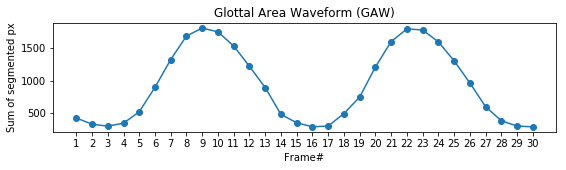

In [6]:
frames = np.arange(1,31) # 1, 2, ..., 30
gaw = segmented_frames.sum((1,2))

plt.figure(figsize=(9,2))
plt.plot(frames, gaw, "o-")
plt.title("Glottal Area Waveform (GAW)")
plt.xlabel("Frame#")
plt.ylabel("Sum of segmented px")
plt.xticks(frames);